In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# import the data set
df = sns.load_dataset('tips')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
# check this null values
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
# check this duplicated values
df.duplicated().sum()

1

In [7]:
# Remove this duplicated values
df = df.drop_duplicates()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  243 non-null    float64 
 1   tip         243 non-null    float64 
 2   sex         243 non-null    category
 3   smoker      243 non-null    category
 4   day         243 non-null    category
 5   time        243 non-null    category
 6   size        243 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 9.1 KB


In [9]:
df.shape

(243, 7)

array([[<Axes: title={'center': 'total_bill'}>,
        <Axes: title={'center': 'tip'}>],
       [<Axes: title={'center': 'size'}>, <Axes: >]], dtype=object)

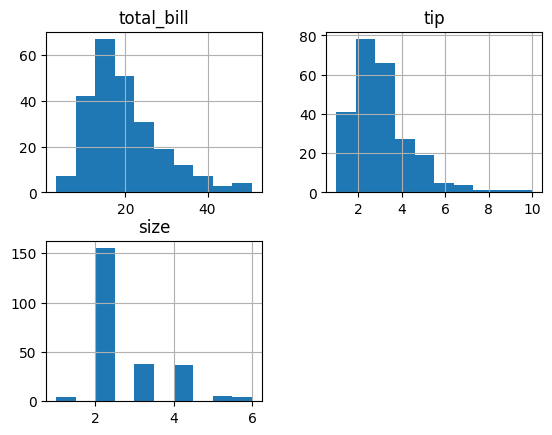

In [10]:
df.hist()

c:\Users\Kashif\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='day', ylabel='tip'>

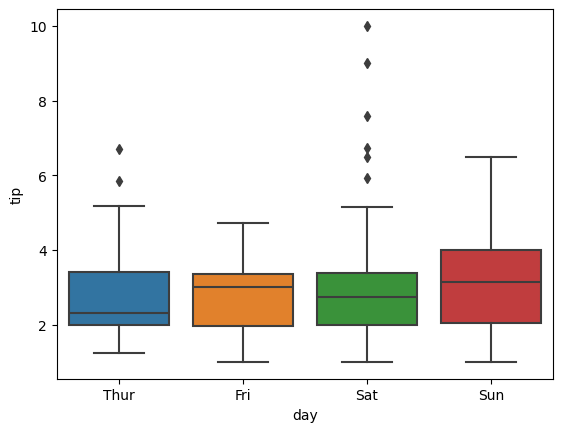

In [11]:
# Create a box plot
sns.boxplot(data = df, x = "day", y = "tip")

In [12]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [13]:
# check this correlation and select only numeric values
numeric_columns = df._get_numeric_data().columns
df[numeric_columns].corr()
df_corr = df[numeric_columns].corr()
df_corr

,total_bill,tip,size
total_bill,1.000000,0.674998,0.597589
tip,0.674998,1.000000,0.488400
size,0.597589,0.488400,1.000000


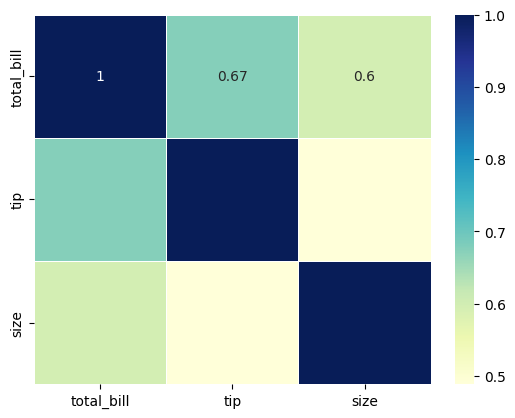

In [14]:

# create a heatmap & apply for  anotation complete code
sns.heatmap(df_corr, annot= True, cmap="YlGnBu", linewidths=.5)
plt.show()







<Axes: xlabel='total_bill', ylabel='tip'>

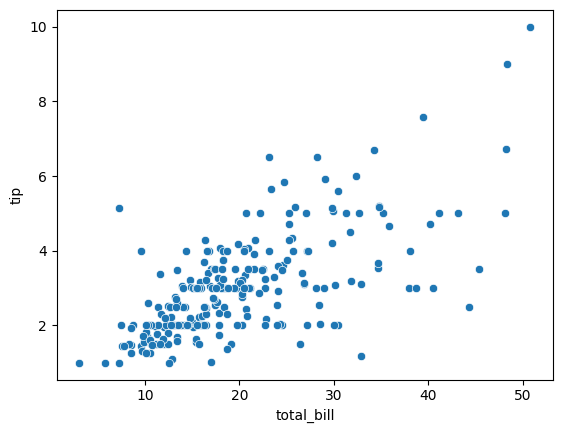

In [15]:
# Create a scatter plot
sns.scatterplot(data=df, x="total_bill", y="tip")

In [16]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

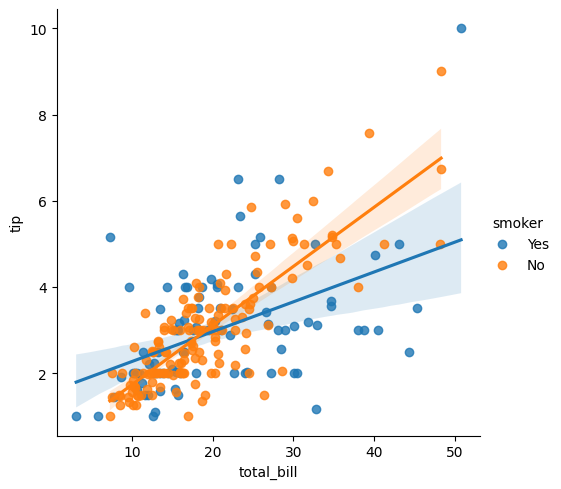

In [17]:
# Creata lm plot
sns.lmplot(data=df, x="total_bill", y="tip", hue="smoker")

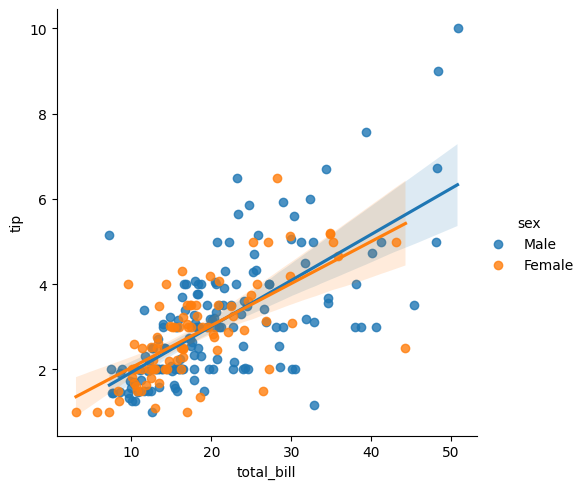

In [18]:
sns.lmplot(data=df, x="total_bill", y="tip", hue="sex")

In [19]:
fig = px.scatter(df, x='total_bill', y='tip', color='smoker', trendline='ols')

# add the tittle and labels for the x and y
fig.update_layout(title='Scatter Plot with LM line', xaxis_title='Total Bill', yaxis_title='Tip')
fig.show()

# How to perform complete EDA in one snippet of code?

In [2]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ydata_profiling import ProfileReport

In [3]:
df = sns.load_dataset('tips')
profile = ProfileReport(df)
profile.to_file('report.html')

Summarize dataset:  64%|██████▍   | 9/14 [00:00<00:00,  6.70it/s, Calculate auto correlation]  c:\Users\Kashif\AppData\Local\Programs\Python\Python311\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Sun'')
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 179.45it/s]
